In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)

In [7]:
setwd("/gpfs/data/gilbert-lab/Lutz/Epomophorus/ps_files")
#make ps object
biom <- import_biom("epomophorus_deblur.biom")
map <- import_qiime_sample_data("DMR_mapfile.txt")
tree <- read_tree("rep_phylo.tre")
bat_nt <- merge_phyloseq(biom,tree,map)
bat_nt <- prune_samples((sample_sums(bat_nt) > 1000), bat_nt)
#transform
bat_t <- bat_nt %>%
    transform_sample_counts(function(x) x / sum(x))
#save files
saveRDS(bat_nt, "../RDSfiles/bat_nt.rds")
saveRDS(bat_t, "../RDSfiles/bat_t.rds")


Warning message in strsplit(msg, "\n"):
“input string 1 is invalid in this locale”

In [8]:
bat_nt
bat_t

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 562 taxa and 47 samples ]
sample_data() Sample Data:       [ 47 samples by 13 sample variables ]
tax_table()   Taxonomy Table:    [ 562 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 562 tips and 560 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 562 taxa and 47 samples ]
sample_data() Sample Data:       [ 47 samples by 13 sample variables ]
tax_table()   Taxonomy Table:    [ 562 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 562 tips and 560 internal nodes ]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


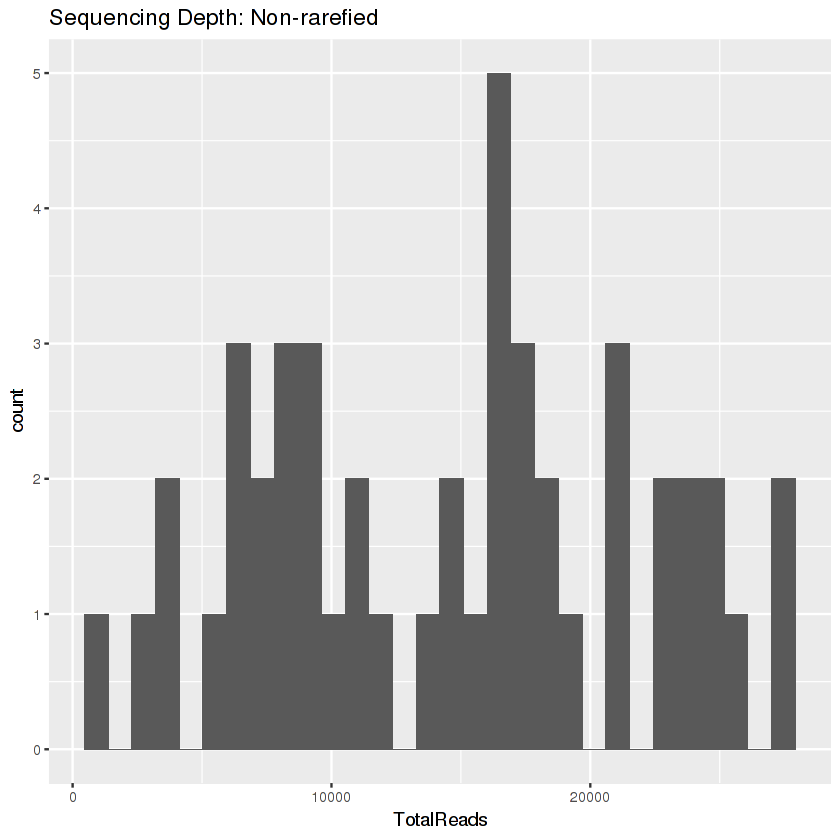

In [9]:
batrun_sdt = data.table(as(sample_data(bat_nt), "data.frame"),
                 TotalReads = sample_sums(bat_nt), keep.rownames = TRUE)
setnames(batrun_sdt, "rn", "SampleName")
pSeqDepth = ggplot(batrun_sdt, aes(TotalReads)) + geom_histogram() + ggtitle("Sequencing Depth: Non-rarefied")
pSeqDepth

In [10]:
batrun.summary = batrun_sdt %>%
    group_by(Sex) %>%
summarise(avg = mean(TotalReads), 
              sd = sd(TotalReads), 
              sem = sd/sqrt(length(TotalReads))) %>%
    arrange((Sex))
batrun.summary[complete.cases(batrun.summary),]

Sex,avg,sd,sem
Female,13029.80,7084.226,1584.081
Male,15518.81,7268.422,1398.809
